# Learn: Transformations to Achieve Linearity

In [1]:
%config InlineBackend.figure_format='retina'

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.stats import pearsonr
sns.set(style="whitegrid")

## Example 1

If the trend is exponential, use a natural log transformation on the independent variables to straighten it.

In [2]:
year    = np.array([ 1938,  1943,  1948,  1953,  1958,  1963,  1968,  1973,  1978,  1983,  1988,  1993,   1998])
balance = np.array([10000, 12167, 14802, 18009, 21911, 26658, 32434, 39461, 48010, 58412, 71067, 86464, 105196]) 

Pearson's r: 0.9531250679404935


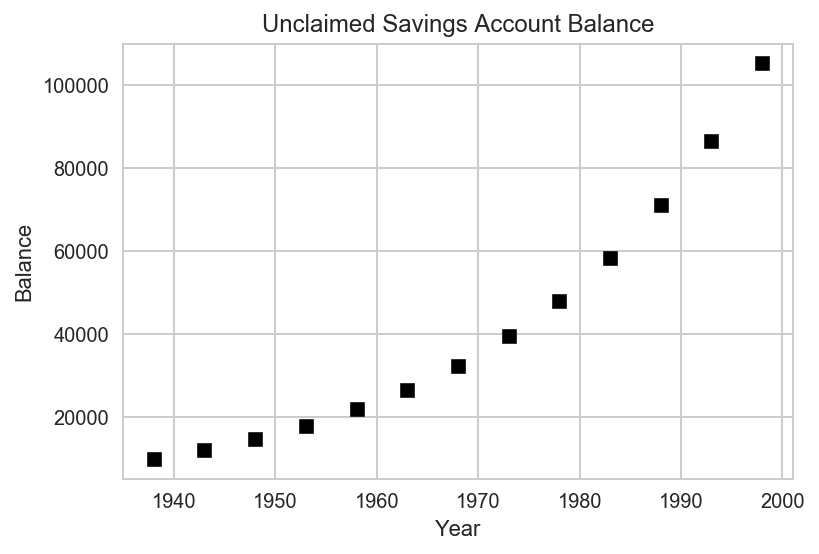

In [3]:
def scatterplot(x=year, 
                y=balance, 
                title="Unclaimed Savings Account Balance",
                xlab="Year", 
                ylab="Balance", 
                color="black",
                facecolor="white",
                marker="s",
                info=True, 
                reg=False, 
                deg=1):
    plt.grid(True)
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.scatter(x, y, marker=marker, color=color)
    ax = plt.gca()
    ax.set_facecolor(facecolor)
    if reg:
        fit = np.polyfit(x, y, deg)
        model = np.poly1d(fit)
        xp = np.linspace(min(x), max(x), 1000)
        plt.plot(xp, model(xp), color="red")
        print("Regression equation:", model)
    if info:
        print("Pearson's r:", pearsonr(x, y)[0])
scatterplot()

Pearson's r: 0.9999999997679334


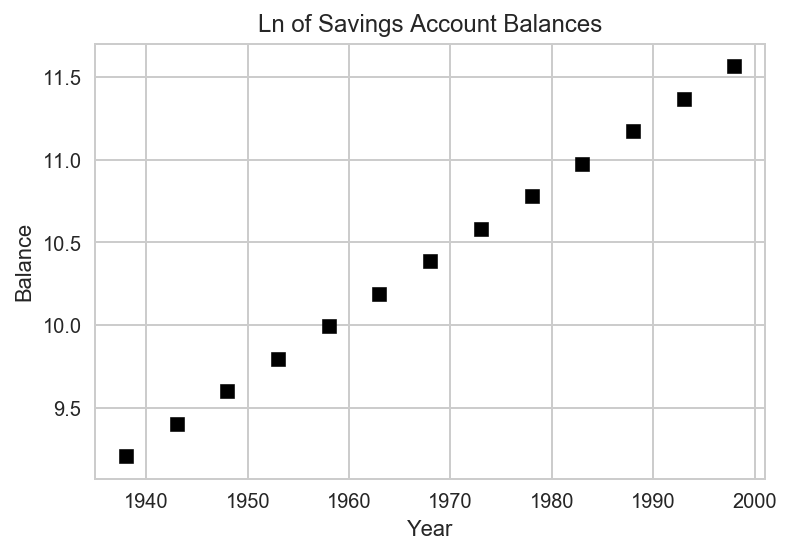

In [4]:
# Now, apply the transformation to straighten it
scatterplot(title="Ln of Savings Account Balances", y=np.log(balance))

Indeed, the correlation coefficient is 1. We have successfully straightened the data.

Regression equation:  
0.03922 x - 66.8
Pearson's r: 0.9999999997679334


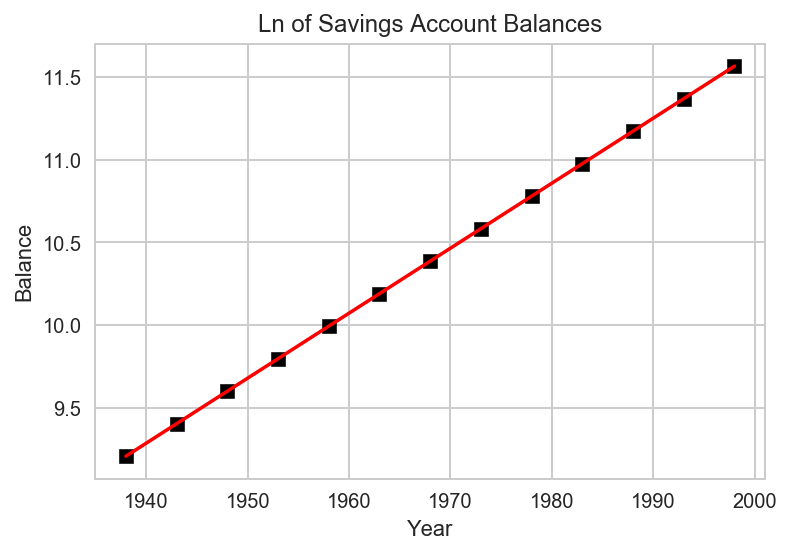

In [5]:
# Let's see the regression line for it
scatterplot(title="Ln of Savings Account Balances", y=np.log(balance), reg=True)

## Example 2

In [6]:
time = np.array([    5,    10,  15,  20,   25,   30,   35,   40,   45,   50,   55,   60,   65])
temp = np.array([129.4, 113.4, 106, 100, 91.4, 89.1, 85.5, 83.1, 78.8, 77.6, 73.7, 70.1, 70.9])

Pearson's r: -0.9520569662213458


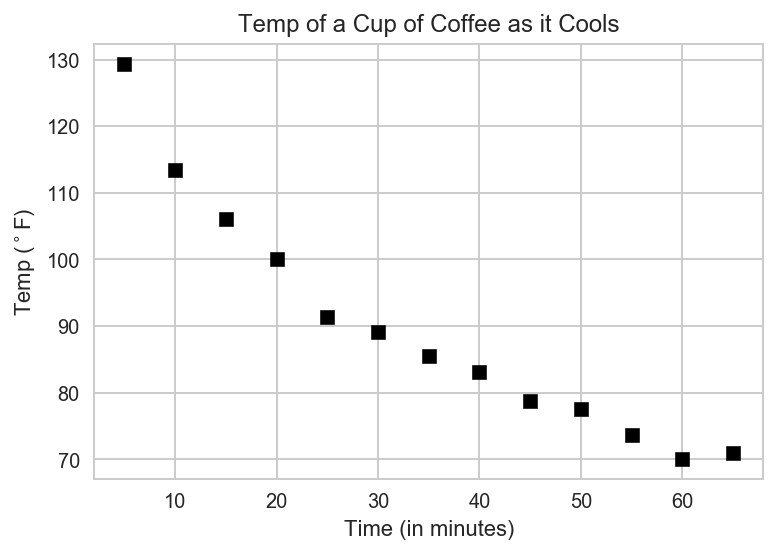

In [7]:
def scatterplot2(x=time, y=temp, 
                 title="Temp of a Cup of Coffee as it Cools",
                 reg=False):
    scatterplot(x, y, title=title, 
                xlab="Time (in minutes)", ylab="Temp ($^\circ$F)",
                reg=reg)
scatterplot2()

Pearson's r: -0.9748028559678675


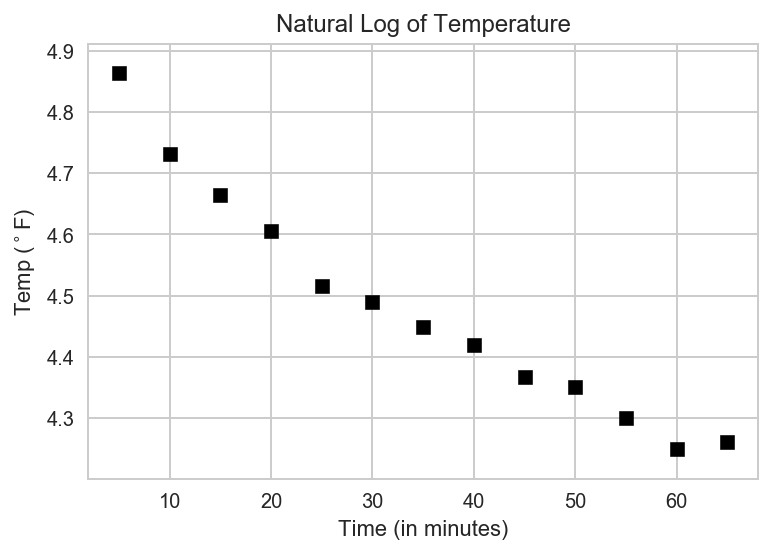

In [8]:
# Natural log transformation
scatterplot2(y=np.log(temp), title="Natural Log of Temperature")

Regression equation:  
-0.009446 x + 4.813
Pearson's r: -0.9748028559678675


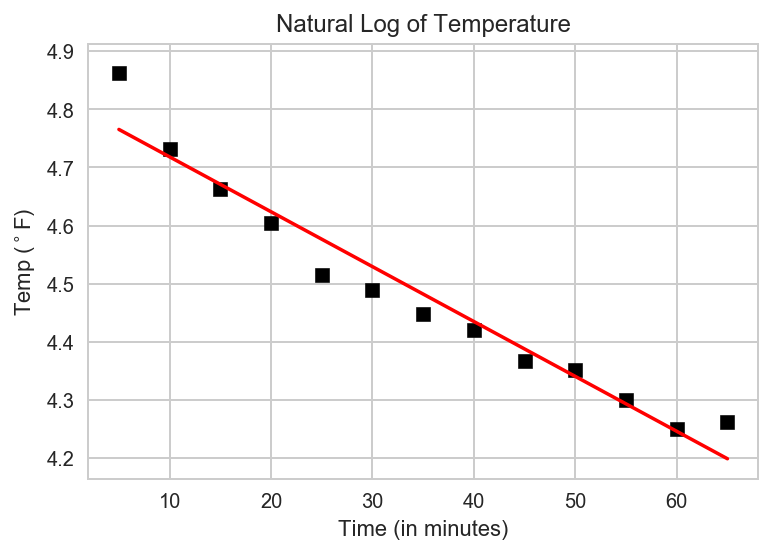

In [9]:
# Regression of natural log transformation
plot2_reg = scatterplot2(y=np.log(temp), title="Natural Log of Temperature", reg=True)

[Text(0,0.5,'Residual'),
 Text(0.5,0,'Predicted'),
 Text(0.5,1,'Residual Plot of Ln of Temp vs. Time')]

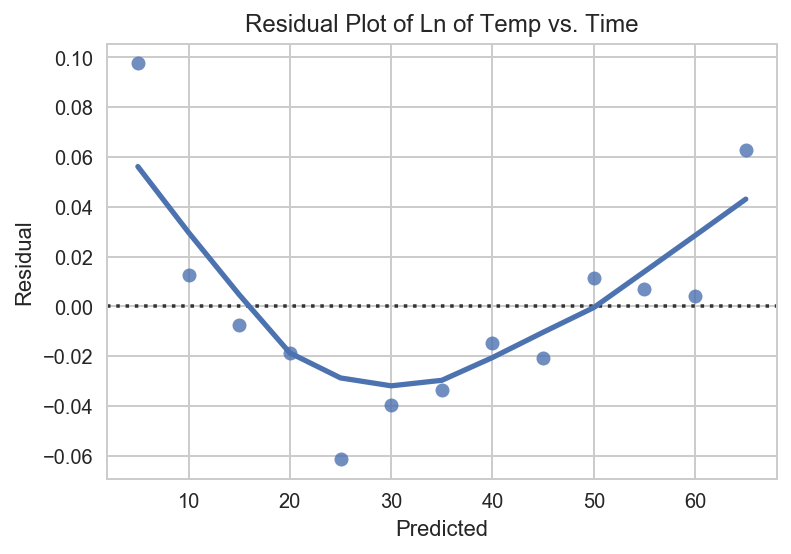

In [24]:
# Residual plot of the natural log transformation
residplot = sns.residplot(time, np.log(temp), lowess=True)
residplot.set(title="Residual Plot of Ln of Temp vs. Time", xlabel="Predicted", ylabel="Residual")

## Example 3

In [11]:
dist = np.array([ 36.19,  67.63,  93.50, 142.46,  486.46,  893.38, 1794.37,  2815.19,  3695.95])
year    = np.array([0.2410, 0.6156, 1.0007, 1.8821, 11.8704, 29.4580, 84.0100, 164.7800, 248.5400])

Pearson's r: 0.9887050851005595


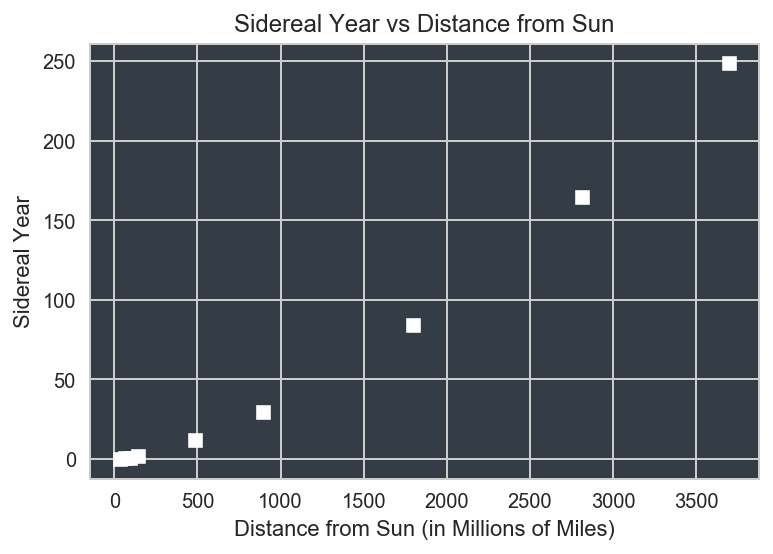

In [22]:
def scatterplot3(x=dist, y=year,
                 title="Sidereal Year vs Distance from Sun",
                 xlab="Distance from Sun (in Millions of Miles)",
                 ylab="Sidereal Year"):
    scatterplot(x, y, title=title, xlab=xlab, ylab=ylab, color="white", facecolor=(52/255, 61/255, 70/255))
scatterplot3()

Pearson's r: 0.9999999210135239


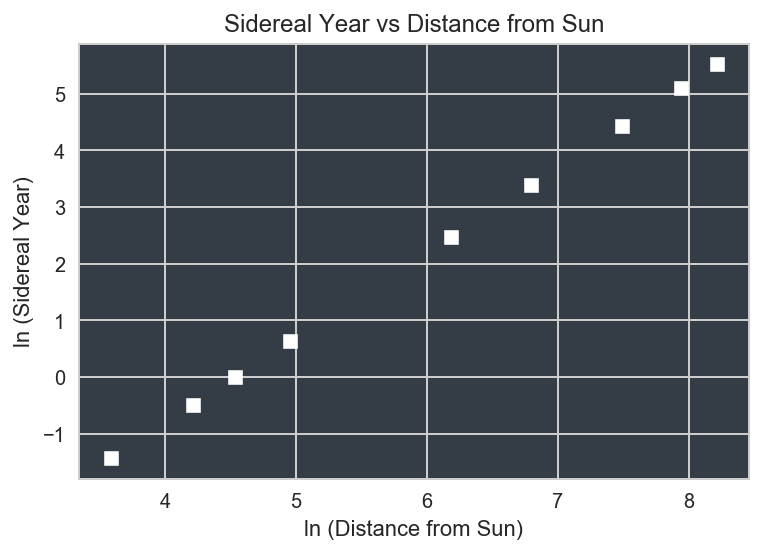

In [23]:
# Straighten it out by applying natural log to both variables
scatterplot3(np.log(dist), np.log(year),
             xlab="ln (Distance from Sun)",
             ylab="ln (Sidereal Year)")

[Text(0,0.5,'Residual'),
 Text(0.5,0,'ln (Distance from Sun)'),
 Text(0.5,1,'Sidereal Year vs Distance from Sun')]

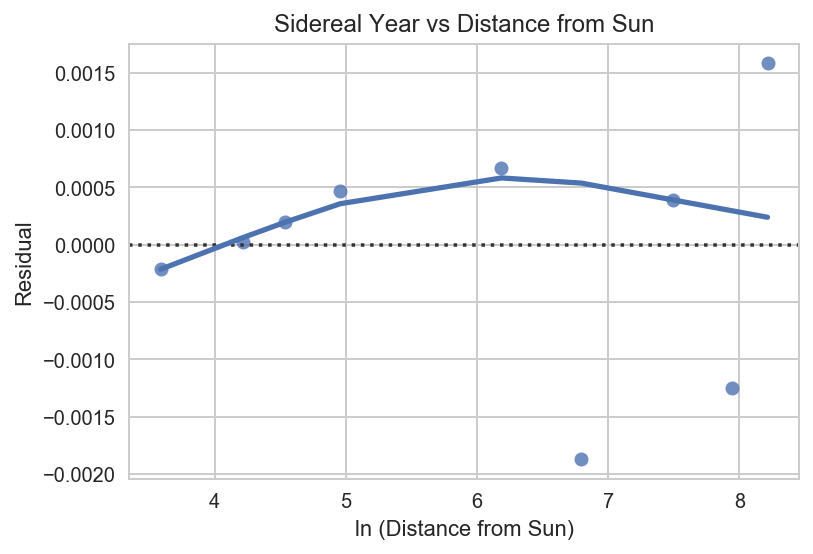

In [26]:
# Residual plot of the natural log transformation
residplot = sns.residplot(np.log(dist), np.log(year), lowess=True)
residplot.set(title="Sidereal Year vs Distance from Sun", xlabel="ln (Distance from Sun)", ylabel="Residual")